In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_pop = pd.read_csv("df_population.csv")
df_veg = pd.read_csv("df_vegetal.csv")
df_anim = pd.read_csv("nouveau_animaux.csv")

In [2]:
"""
1) Nettoyer les titres de colonnes :
Supprimer les espaces au début et à la fin des titres
Remplacer les espaces par des underscores (ceux se situant entre les mots)
Tout mettre en minuscule
"""
df_pop.columns = df_pop.columns.str.replace(' ', '_').str.lower()
df_anim.columns = df_anim.columns.str.replace(' ', '_').str.lower()
df_veg.columns = df_veg.columns.str.replace(' ', '_').str.lower()

### 2) Quelles sont les dimensions des jeux de données ?

In [3]:
print(f"Dimensions du df_pop : {df_pop.ndim}. Shape du df_pop : {df_pop.shape}")
print(f"Dimensions du df_anim : {df_anim.ndim}. Shape du df_anim : {df_anim.shape}")
print(f"Dimensions du df_veg : {df_veg.ndim}. Shape du df_veg : {df_veg.shape}")

Dimensions du df_pop : 2. Shape du df_pop : (364, 14)
Dimensions du df_anim : 2. Shape du df_anim : (27713, 14)
Dimensions du df_veg : 2. Shape du df_veg : (92233, 14)


### 3) A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [4]:
df_pop.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,36686.78,X,Figure from international organizations
1,FBS,Food Balances (2010-),4,Afghanistan,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,37769.50,X,Figure from international organizations
2,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,2877.01,X,Figure from international organizations
3,FBS,Food Balances (2010-),8,Albania,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 No,2873.88,X,Figure from international organizations
4,FBS,Food Balances (2010-),12,Algeria,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 No,41927.01,X,Figure from international organizations


In [5]:
df_veg.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,162.62,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,160.40,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2018,2018,kcal/cap/d,1365.34,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2019,2019,kcal/cap/d,1346.93,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2511,Wheat and products,2018,2018,g/cap/d,41.23,E,Estimated value


In [6]:
df_anim.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(fbs),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.67,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.76,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/cap/d,14.92,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/cap/d,15.42,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/cap/d,1.12,E,Estimated value


### 4) Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. Une fois cette étape effectuée, regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.

In [7]:
df_anim["type"] = "animal"
df_veg["type"] = "vegetal"

In [8]:
df_products = pd.merge(df_veg, df_anim, how = "outer")

### 5) Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’

In [9]:
df_pop.head(3)
df_pop = df_pop[["area_code_(m49)", "area", "year", "value"]]
df_pop = df_pop.rename(columns={"value" : "pop_1000_hab"})
df_pop

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,36686.78
1,4,Afghanistan,2019,37769.50
2,8,Albania,2018,2877.01
3,8,Albania,2019,2873.88
4,12,Algeria,2018,41927.01
...,...,...,...,...
359,887,Yemen,2019,31546.69
360,894,Zambia,2018,17835.89
361,894,Zambia,2019,18380.48
362,716,Zimbabwe,2018,15052.18


### 6) Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit.

In [10]:
df_products = df_products[["area_code_(m49)", "area", "element", "item", "year", "type", "unit", "value"]]
df_products

,area_code_(m49),area,element,item,year,type,unit,value
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23
...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00


### 7) Fusionnez df_pop avec product et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. Renommer les colonnes comme sur le capture d’écran ci-dessous.

In [11]:
df = pd.merge(df_products, df_pop, on=["area", "year", "area_code_(m49)"], how="left")
df

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62,36686.78
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40,37769.50
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34,36686.78
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93,37769.50
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23,36686.78
...,...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00,15354.61
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00,15354.61
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00,15354.61
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00,15354.61


### 8) Quelles sont les types de données de chaque colonne ?

In [12]:
df.dtypes

area_code_(m49)      int64
area                object
element             object
item                object
year                 int64
type                object
unit                object
value              float64
pop_1000_hab       float64
dtype: object

### 9) Combien y-a t’il de valeurs manquantes par variable ?

In [ ]:
df.isna().sum()

### 10) Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [13]:
df.describe()

,area_code_(m49),year,value,pop_1000_hab
count,119946.000000,119946.000000,119946.000000,1.199460e+05
mean,427.344122,2018.509062,11.643984,4.327827e+04
std,250.391442,0.499920,56.450984,1.534066e+05
min,4.000000,2018.000000,0.000000,1.213000e+01
25%,208.000000,2018.000000,0.010000,2.508880e+03
50%,422.000000,2019.000000,0.270000,9.958830e+03
75%,642.000000,2019.000000,3.330000,3.154669e+04
max,894.000000,2019.000000,1744.850000,1.421864e+06


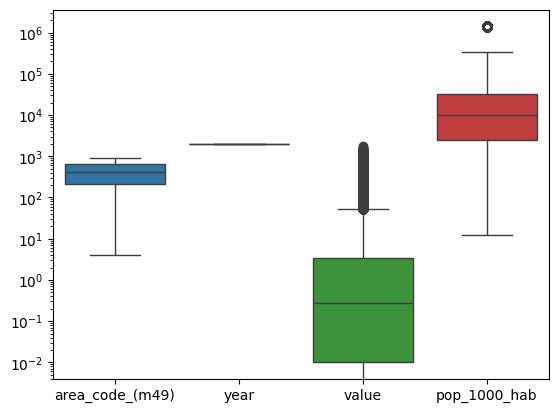

In [14]:
sns.boxplot(data=df, whis=15)
plt.yscale("log")
plt.show()

### 11) Affichez les valeurs uniques de la colonne country

In [15]:
df["area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polyn

### Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.

In [16]:
# RAS 
df

,area_code_(m49),area,element,item,year,type,unit,value,pop_1000_hab
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,162.62,36686.78
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,160.40,37769.50
2,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/cap/d,1365.34,36686.78
3,4,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/cap/d,1346.93,37769.50
4,4,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/cap/d,41.23,36686.78
...,...,...,...,...,...,...,...,...,...
119941,716,Zimbabwe,Fat supply quantity (g/capita/day),"Molluscs, Other",2019,animal,g/cap/d,0.00,15354.61
119942,716,Zimbabwe,Food supply quantity (kg/capita/yr),"Aquatic Animals, Others",2019,animal,kg,0.00,15354.61
119943,716,Zimbabwe,Food supply (kcal/capita/day),"Aquatic Animals, Others",2019,animal,kcal/cap/d,0.00,15354.61
119944,716,Zimbabwe,Protein supply quantity (g/capita/day),"Aquatic Animals, Others",2019,animal,g/cap/d,0.00,15354.61


### 13) Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item. Les valeurs de la colonne element doivent être séparées dans des colonnes différentes. Recherchez sur internet la différence entre les formats long et les formats wide. Pour réussir cette étape creuser la méthode pivot_table. Il est préférable d’appliquer la méthode reset_index() après avoir utilisé la méthode précédente.

In [17]:
# MODIFICATION DU NOM DE LA VARIABLE AREA_CODE
df = df.rename(columns={"area_code_(m49)" : "area_code"})
df = df.rename(columns={"element" : "index"})

In [18]:
df = df.pivot_table(index=["area_code", "area", "year", "pop_1000_hab", "type", "item"], columns="index", values="value")
# df_test.head(70)
# df_test.reset_index()

In [19]:
df = df.reset_index()
df

index,area_code,area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80


### 14) Faire du nettoyage dans le nom des colonnes
Notez bien la dimension du jeu de données. Si tout s'est bien déroulé vous devez avoir le même resultat, sinon revoyez les étapes précédentes.

In [20]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.shape

(30016, 10)

### 15) Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [21]:
filtre_2018 = df["year"] == 2018
df[filtre_2018]

index,area_code,area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49
...,...,...,...,...,...,...,...,...,...,...
29926,894,Zambia,2018,17835.89,vegetal,Tea (including mate),0.00,0.04,0.11,0.00
29927,894,Zambia,2018,17835.89,vegetal,Tomatoes and products,0.01,0.77,1.38,0.03
29928,894,Zambia,2018,17835.89,vegetal,"Vegetables, other",0.18,15.27,20.14,1.28
29929,894,Zambia,2018,17835.89,vegetal,Wheat and products,0.29,60.49,7.99,1.91


### 16) Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique. J’ai récupéré ces informations pour vous sur le site de la FAO. Effectuer un merge entre ce jeu de données et le vôtre.
BONUS Créer ce jeu de données par vous même sur le site de la FAO.

In [22]:
df_continents = pd.read_csv("continents.csv")
df_continents.columns = df_continents.columns.str.replace(' ', '_').str.lower()
df_continents = df_continents.rename(columns={"area_code_(m49)" : "area_code"})
df_continents = df_continents[["country_group", "m49_code", "country"]]
df_continents = df_continents.rename(columns={"m49_code" : "area_code"})
df_continents.dropna(subset=["area_code"], inplace=True)
df_continents.area_code = df_continents.area_code.astype(int)
df_continents = df_continents.rename(columns={'area_code' : 'country_code'})
df_continents = df_continents.rename(columns={"country_group" : "continent"})
df_continents = df_continents.drop_duplicates(subset="country_code")
df_continents 

,continent,country_code,country
0,Africa,577,"Africa, unspecified"
1,Africa,12,Algeria
2,Africa,24,Angola
3,Africa,204,Benin
4,Africa,72,Botswana
...,...,...,...
1745,Oceania,286,"Polynesia, unspecified"
1753,Oceania,872,Wake Island
2322,World,529,"Developing countries, unspecified"
2443,World,899,Others (adjustment)


In [23]:
df = df.rename(columns={"area" : "country", "area_code" : "country_code"})

In [24]:
new_df = pd.merge(df, df_continents, on = ["country_code", "country"], how="inner")
new_df

,country_code,country,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),continent
0,4,Afghanistan,2018,36686.78,animal,Bovine Meat,1.16,14.92,2.67,1.12,Asia
1,4,Afghanistan,2018,36686.78,animal,"Butter, Ghee",2.58,23.35,1.14,0.02,Asia
2,4,Afghanistan,2018,36686.78,animal,Cream,0.03,0.31,0.04,0.00,Asia
3,4,Afghanistan,2018,36686.78,animal,Demersal Fish,0.00,0.17,0.15,0.03,Asia
4,4,Afghanistan,2018,36686.78,animal,Eggs,0.38,5.52,1.57,0.49,Asia
...,...,...,...,...,...,...,...,...,...,...,...
30011,894,Zambia,2019,18380.48,vegetal,Tea (including mate),0.00,0.04,0.10,0.00,Africa
30012,894,Zambia,2019,18380.48,vegetal,Tomatoes and products,0.01,0.77,1.36,0.03,Africa
30013,894,Zambia,2019,18380.48,vegetal,"Vegetables, other",0.16,13.58,17.53,1.12,Africa
30014,894,Zambia,2019,18380.48,vegetal,Wheat and products,0.30,57.63,7.61,1.80,Africa
